In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

In [4]:
dataset = pd.read_csv('../../dataset/preprocessed.csv')

### Razdvajamo atribut Revanue od ostalih

In [5]:
X = dataset.drop(columns=['Revenue'])
y = dataset['Revenue']

### Podela skupa na train i test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.3, stratify = y)
X_train_original = pd.DataFrame(X_train, columns = X.columns)

### Standardizacija

In [7]:
stand = StandardScaler()
X_train_scaled = stand.fit_transform(X_train)
X_test_scaled = stand.transform(X_test)

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
X_train_scaled.shape

(8442, 73)

In [9]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)
X_test_scaled.shape

(3618, 73)

### Cratanje matrice

In [10]:
def cnf_matrix(y_pred_test, colormap): 
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                                        display_labels=[False, True])
    
    cm_display = cm_display.plot(cmap=colormap, values_format='g')


In [11]:
params = {
    'max_depth' : [3, 5, 7, 10, 15, 20],
    'criterion' : ['gini', 'entropy']
}

In [12]:
tree_classifier = DecisionTreeClassifier()
grid = GridSearchCV(estimator=tree_classifier, 
                    param_grid=params, 
                    cv=5, 
                    verbose=8)
grid.fit(X_train_scaled, y_train)
grid.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.891 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=0.902 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=0.889 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.898 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.892 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.893 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.898 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.893 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.889 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.900 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=7;, score=0.893 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=7;

{'criterion': 'entropy', 'max_depth': 5}

In [13]:
tree_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
tree_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Train result: 0.9068941009239516
Test result: 0.9010503040353787

               precision    recall  f1-score   support

           0       0.92      0.97      0.94      3073
           1       0.74      0.53      0.62       545

    accuracy                           0.90      3618
   macro avg       0.83      0.75      0.78      3618
weighted avg       0.89      0.90      0.89      3618



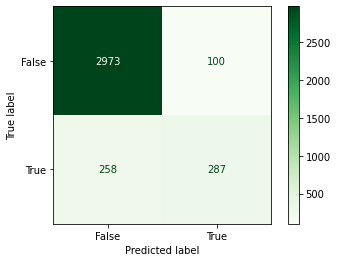

In [14]:
y_pred_train = tree_classifier.predict(X_train_scaled)
y_pred_test = tree_classifier.predict(X_test_scaled)
    
train_result = accuracy_score(y_train, y_pred_train)
print("Train result:", train_result)
test_result = accuracy_score(y_test, y_pred_test)
print("Test result:", test_result)
  
print("\n", classification_report(y_test, y_pred_test))

cnf_matrix(y_pred_test, plt.cm.Greens)

### Sada sa balansiranjem klasa

In [15]:
oversample = SMOTE(random_state = 2, sampling_strategy = 'minority')
X_train_smote, y_train = oversample.fit_resample(X_train_scaled, y_train.ravel())

In [16]:
params = {
    'max_depth' : [3, 5, 7, 10, 15, 20],
    'criterion' : ['gini', 'entropy']
}

In [17]:
tree_classifier = DecisionTreeClassifier()
grid = GridSearchCV(estimator=tree_classifier, 
                    param_grid=params, 
                    cv=5, 
                    verbose=8)
grid.fit(X_train_smote, y_train)
grid.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.850 total time=   0.1s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=0.893 total time=   0.1s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=0.904 total time=   0.1s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.906 total time=   0.1s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.911 total time=   0.1s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.836 total time=   0.1s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.914 total time=   0.1s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.910 total time=   0.1s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.917 total time=   0.1s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.922 total time=   0.1s
[CV 1/5] END .......criterion=gini, max_depth=7;, score=0.825 total time=   0.1s
[CV 2/5] END .......criterion=gini, max_depth=7;

{'criterion': 'entropy', 'max_depth': 15}

In [18]:
tree_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15)
tree_classifier.fit(X_train_smote, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

Train result: 0.9847977684797768
Test result: 0.8700939745715865

               precision    recall  f1-score   support

           0       0.94      0.91      0.92      3073
           1       0.56      0.65      0.60       545

    accuracy                           0.87      3618
   macro avg       0.75      0.78      0.76      3618
weighted avg       0.88      0.87      0.87      3618



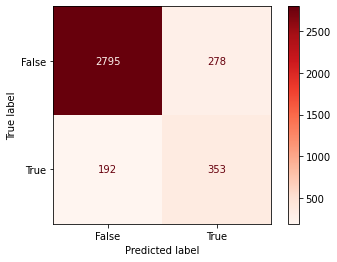

In [19]:
y_pred_train = tree_classifier.predict(X_train_smote)
y_pred_test = tree_classifier.predict(X_test_scaled)
    
train_result = accuracy_score(y_train, y_pred_train)
print("Train result:", train_result)
test_result = accuracy_score(y_test, y_pred_test)
print("Test result:", test_result)
  
print("\n", classification_report(y_test, y_pred_test))

cnf_matrix(y_pred_test, plt.cm.Reds)

In [20]:
fpr_tree, tpr_tree, threshold_tree = roc_curve(y_test, y_pred_test)
roc_auc_tree = auc(fpr_tree, tpr_tree)

In [21]:
%store y_pred_test
%store fpr_tree
%store tpr_tree
%store threshold_tree
%store roc_auc_tree

Stored 'y_pred_test' (ndarray)
Stored 'fpr_tree' (ndarray)
Stored 'tpr_tree' (ndarray)
Stored 'threshold_tree' (ndarray)
Stored 'roc_auc_tree' (float64)
